In [1]:
from deconvtest import Step
from deconvtest import Workflow

import numpy as np
import pandas as pd
from skimage import io
import pylab as plt

In [2]:
w = Workflow()
w.load('workflow.json')
w

{
    "name": "test workflow",
    "filename": "workflow.json",
    "output path": "test_workflow",
    "steps": [
        {
            "name": "GroundTruth",
            "number of inputs": 0,
            "number of outputs": 1,
            "method": "ellipsoid",
            "parameter_path": "params_ellipsoid.csv",
            "number of parameter combinations": 2,
            "input step": []
        },
        {
            "name": "PSF",
            "number of inputs": 0,
            "number of outputs": 1,
            "method": "gaussian",
            "parameter_path": "params_psf.csv",
            "number of parameter combinations": 6,
            "input step": []
        },
        {
            "name": "Convolution",
            "number of inputs": 2,
            "number of outputs": 1,
            "method": "convolve",
            "parameter_path": null,
            "number of parameter combinations": 0,
            "input step": [
                0,
                1
      

In [3]:
w.get_workflow_graph()

{'name': 'workflow_graph',
 'items': [{'name': 'item000',
   'modules': [{'name': 'GroundTruth',
     'method': 'ellipsoid',
     'theta': 1.5707963267948966,
     'phi': 4.188790204786391,
     'size': [10.0, 6.0, 6.0],
     'voxel_size': [0.5, 0.2, 0.2],
     'outputID': 'GT0000'},
    {'name': 'PSF',
     'method': 'gaussian',
     'sigma': 1,
     'aspect': 3,
     'voxel_size': 1.0,
     'outputID': 'PSF0000'},
    {'name': 'Convolution',
     'method': 'convolve',
     'outputID': 'GT0000_PSF0000_Convolution0000',
     'inputIDs': ['GT0000', 'PSF0000']},
    {'name': 'Transform',
     'method': 'poisson_noise',
     'snr': 2,
     'outputID': 'GT0000_PSF0000_Convolution0000_noise0000',
     'inputIDs': ['GT0000_PSF0000_Convolution0000']},
    {'name': 'Evaluation',
     'method': 'rmse',
     'outputID': 'GT0000_PSF0000_Convolution0000_noise0000_Evaluation0000',
     'inputIDs': ['GT0000_PSF0000_Convolution0000_noise0000', 'GT0000']}]},
  {'name': 'item001',
   'modules': [{'name

In [4]:
 w.workflow['items'][10]

{'name': 'item010',
 'modules': [{'name': 'GroundTruth',
   'method': 'ellipsoid',
   'theta': 1.5707963267948966,
   'phi': 4.188790204786391,
   'size': [10.0, 6.0, 6.0],
   'voxel_size': [0.5, 0.2, 0.2],
   'outputID': 'GT0000'},
  {'name': 'PSF',
   'method': 'gaussian',
   'sigma': 2,
   'aspect': 3,
   'voxel_size': 1.0,
   'outputID': 'PSF0003'},
  {'name': 'Convolution',
   'method': 'convolve',
   'outputID': 'GT0000_PSF0003_Convolution0000',
   'inputIDs': ['GT0000', 'PSF0003']},
  {'name': 'Transform',
   'method': 'poisson_noise',
   'snr': 5,
   'outputID': 'GT0000_PSF0003_Convolution0000_noise0001',
   'inputIDs': ['GT0000_PSF0003_Convolution0000']},
  {'name': 'Evaluation',
   'method': 'rmse',
   'outputID': 'GT0000_PSF0003_Convolution0000_noise0001_Evaluation0000',
   'inputIDs': ['GT0000_PSF0003_Convolution0000_noise0001', 'GT0000']}]}

In [5]:
w.run()

Run Running the workflow
Started at  Thu Sep 30 17:12:38 2021
done 1 of 36 ( 2.7777777777777777 % ), approx. time left:  17.7202570438385 sec
done 2 of 36 ( 5.555555555555555 % ), approx. time left:  8.675301313400269 sec
done 3 of 36 ( 8.333333333333334 % ), approx. time left:  5.621932744979858 sec
done 4 of 36 ( 11.11111111111111 % ), approx. time left:  4.092527389526367 sec
done 5 of 36 ( 13.88888888888889 % ), approx. time left:  3.579016542434692 sec
done 6 of 36 ( 16.666666666666668 % ), approx. time left:  2.892439365386963 sec
done 7 of 36 ( 19.444444444444443 % ), approx. time left:  2.672564540590559 sec
done 8 of 36 ( 22.22222222222222 % ), approx. time left:  2.476768136024475 sec
done 9 of 36 ( 25.0 % ), approx. time left:  2.9597575664520264 sec
done 10 of 36 ( 27.77777777777778 % ), approx. time left:  2.5677571296691895 sec
done 11 of 36 ( 30.555555555555557 % ), approx. time left:  2.381977167996493 sec
done 12 of 36 ( 33.333333333333336 % ), approx. time left:  2.10

/opt/anaconda3/envs/deconvtest/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


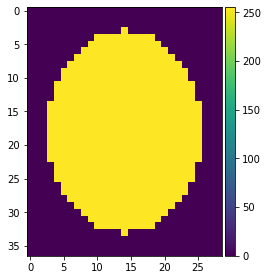

In [6]:
io.imshow(io.imread('test_workflow/GT0000.tif').max(1))

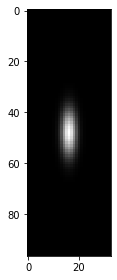

In [7]:
io.imshow(io.imread('test_workflow/PSF0003.tif').max(1))

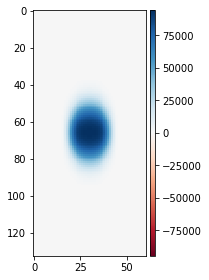

In [8]:
io.imshow(io.imread('test_workflow/GT0000_PSF0003_Convolution0000.tif').max(1))

/opt/anaconda3/envs/deconvtest/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


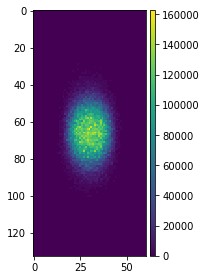

In [9]:
io.imshow(io.imread('test_workflow/GT0000_PSF0003_Convolution0000_noise0001.tif').max(1))

In [10]:
pd.read_csv('test_workflow/GT0000_PSF0003_Convolution0000_noise0001_Evaluation0000.csv')

,OutputID,rmse
0,GT0000_PSF0003_Convolution0000_noise0001_Evalu...,10159.707803
